# Supervised Learning - Linear Regression from Scratch

# Overview
This notebook implements Linear Regression algorithm from scratch using only NumPy, Pandas, and Matplotlib. The implementation includes data preprocessing, model training, evaluation, and visualization.

# ----------------------------------------------------------

## 1. Load Required Libraries

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ----------------------------------------------------------

# 2. Load and Display Dataset

In [57]:
data = pd.read_csv("Medical Price Dataset.csv")
print("Sample Data:")
print(data.head(10))

Sample Data:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
5   31  female  25.740         0     no  southeast   3756.62160
6   46  female  33.440         1     no  southeast   8240.58960
7   37  female  27.740         3     no  northwest   7281.50560
8   37    male  29.830         2     no  northeast   6406.41070
9   60  female  25.840         0     no  northwest  28923.13692


Explanation: Loading the medical insurance dataset to predict insurance charges based on various features like age, BMI, smoking status, etc.

# ----------------------------------------------------------

## 3. Basic Info and Null Check

In [58]:
print("\nDataset Info:")
data.info()

print("\nMissing Values:")
print(data.isnull().sum())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB

Missing Values:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


Data Exploration: Checking the dataset structure, data types, and missing values to understand what preprocessing is needed.

# ----------------------------------------------------------

## 4. Data Preprocessing (Encoding Categorical Variables)

In [59]:
data_encoded = pd.get_dummies(data, columns=['sex', 'smoker', 'region'], drop_first=True)
print("\nEncoded Data Preview:")
print(data_encoded.head())


Encoded Data Preview:
   age     bmi  children      charges  sex_male  smoker_yes  region_northwest  \
0   19  27.900         0  16884.92400     False        True             False   
1   18  33.770         1   1725.55230      True       False             False   
2   28  33.000         3   4449.46200      True       False             False   
3   33  22.705         0  21984.47061      True       False              True   
4   32  28.880         0   3866.85520      True       False              True   

   region_southeast  region_southwest  
0             False              True  
1              True             False  
2              True             False  
3             False             False  
4             False             False  


Preprocessing Explanation:

Converting categorical variables (sex, smoker, region) into numerical format using one-hot encoding
drop_first=True prevents multicollinearity by avoiding the dummy variable trap
This creates binary (0/1) columns for each category

# ----------------------------------------------------------

## 5. Feature and Target Selection

In [60]:
X = data_encoded.drop('charges', axis=1)
y = data_encoded['charges']

Feature Engineering: Separating features (X) from target variable (y - charges) for supervised learning.

# ----------------------------------------------------------

## 6. Normalize Features

In [61]:
X = (X - X.mean()) / X.std()

Normalization Explanation:

Standardizing features to have mean=0 and std=1.
This ensures all features contribute equally to the learning process.
Prevents features with larger scales from dominating the gradient descent.

# ----------------------------------------------------------

## 7. Convert to Numpy Arrays

In [62]:
x_train = X.values.astype(np.float64)
y_train = y.values.astype(np.float64).reshape(-1, 1)

Data Preparation: Converting pandas DataFrames to NumPy arrays for mathematical operations and ensuring proper data types.

In [63]:
print(f"\nTraining data shape: {x_train.shape}")
print(f"Target shape: {y_train.shape}")


Training data shape: (1338, 8)
Target shape: (1338, 1)


# ----------------------------------------------------------

## 8. Linear Regression Implementation From Scratch

# Mathematical Foundation
Linear Regression finds the best-fit line: y = Xw + b

Cost Function: MSE = (1/2m) * Σ(y_actual - y_predicted)²

Gradient Descent: Updates weights and bias to minimize cost

In [64]:
def linear_regression_fit(x_train, y_train, learning_rate=0.01, epochs=1000):
    m, n = x_train.shape
    weights = np.zeros((n, 1))
    bias = 0
    cost_history = []

    for epoch in range(epochs):
        y_pred = np.dot(x_train, weights) + bias
        error = y_train - y_pred
        cost = np.mean(error ** 2) / 2
        cost_history.append(cost)

        grad_w = -(1 / m) * np.dot(x_train.T, error)
        grad_b = -(1 / m) * np.sum(error)

        weights -= learning_rate * grad_w
        bias -= learning_rate * grad_b

    return weights, bias, cost_history

def linear_regression_predict(x, weights, bias):
    return np.dot(x, weights) + bias

# ----------------------------------------------------------

## 9. Train the Model

In [65]:
weights, bias, cost_history = linear_regression_fit(x_train, y_train, learning_rate=0.01, epochs=1000)

Training Process: Using gradient descent with learning rate 0.01 for 1000 epochs to find optimal parameters.

# ----------------------------------------------------------

## 10. Plot Cost Function Over Epochs and Charges by Age (Visualization)

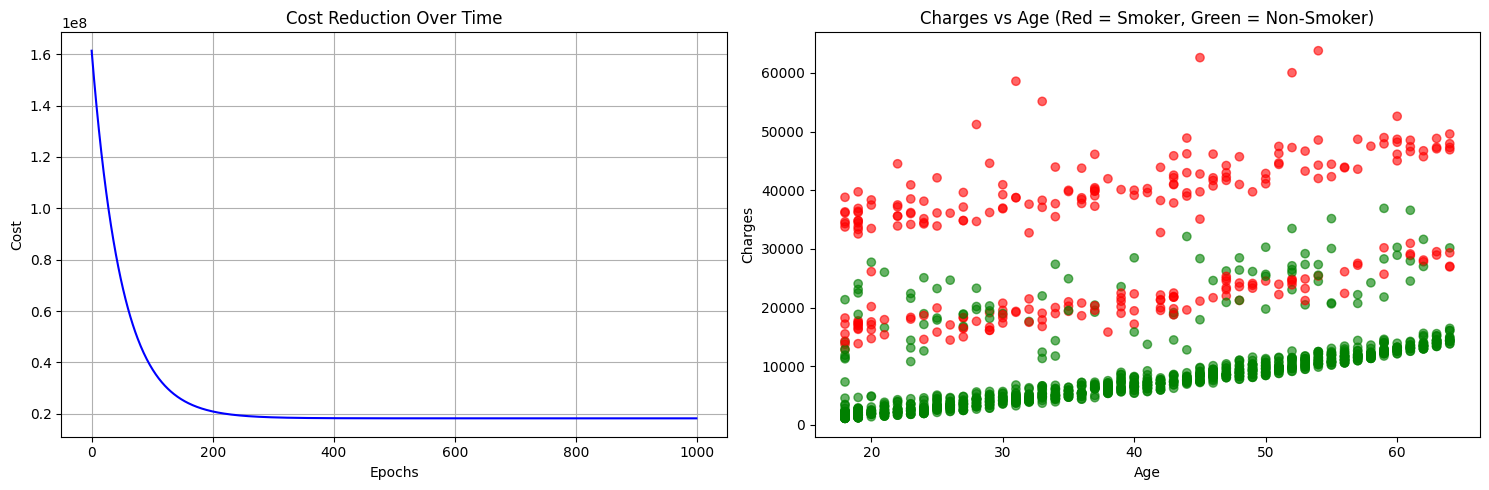

In [66]:
plt.figure(figsize=(15, 5))

# Subplot 1: Cost Reduction Over Epochs
plt.subplot(1, 2, 1)
plt.plot(range(len(cost_history)), cost_history, color='blue')
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.title("Cost Reduction Over Time")
plt.grid(True)

# Subplot 2: Charges vs Age (Colored by Smoking Status)
plt.subplot(1, 2, 2)
smoker_color = data['smoker'].map({'yes': 'red', 'no': 'green'})
plt.scatter(data['age'], data['charges'], c=smoker_color, alpha=0.6)
plt.xlabel("Age")
plt.ylabel("Charges")
plt.title("Charges vs Age (Red = Smoker, Green = Non-Smoker)")

plt.tight_layout()
plt.show()

Visualization Purpose: This plot shows the learning progress - cost should decrease over time, indicating the model is learning.

# ----------------------------------------------------------

# 11. Visualization: BMI vs Charges and Distribution of Charges

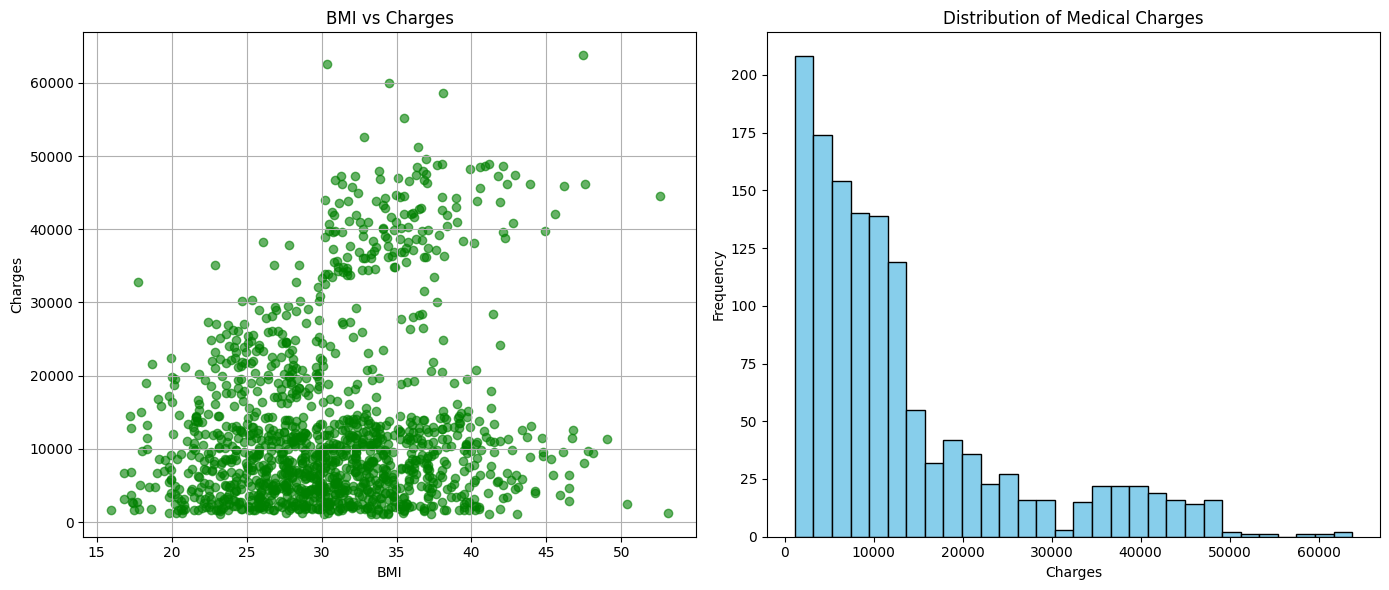

In [67]:
def plot_bmi_vs_charges_and_distribution(data):
    plt.figure(figsize=(14, 6))

    # Scatter Plot: BMI vs Charges
    plt.subplot(1, 2, 1)
    plt.scatter(data['bmi'], data['charges'], alpha=0.6, color='green')
    plt.xlabel("BMI")
    plt.ylabel("Charges")
    plt.title("BMI vs Charges")
    plt.grid(True)

    # Histogram: Distribution of Charges
    plt.subplot(1, 2, 2)
    plt.hist(data['charges'], bins=30, color='skyblue', edgecolor='black')
    plt.xlabel("Charges")
    plt.ylabel("Frequency")
    plt.title("Distribution of Medical Charges")

    plt.tight_layout()
    plt.show()

plot_bmi_vs_charges_and_distribution(data)

# ----------------------------------------------------------

## 12. Predict and Evaluate Performance

In [68]:
predictions = linear_regression_predict(x_train, weights, bias)

## Mean Squared Error (MSE)


In [69]:
mse = np.mean((predictions - y_train) ** 2)
print("Mean Squared Error:", mse)

Mean Squared Error: 36502258.77818522


## R-squared Score

In [70]:
ss_total = np.sum((y_train - np.mean(y_train)) ** 2)
ss_residual = np.sum((y_train - predictions) ** 2)
r2_score = 1 - (ss_residual / ss_total)
print("R-squared Score:", r2_score)

R-squared Score: 0.7509105385983528


# ----------------------------------------------------------

## Visualization - Actual vs Predicted Charges

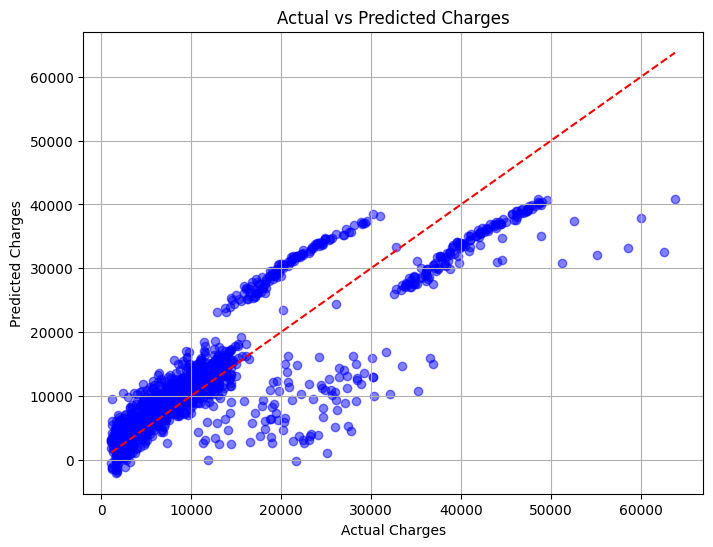

In [71]:
plt.figure(figsize=(8, 6))
plt.scatter(y_train, predictions, alpha=0.5, color='blue')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Charges")
plt.grid(True)
plt.show()